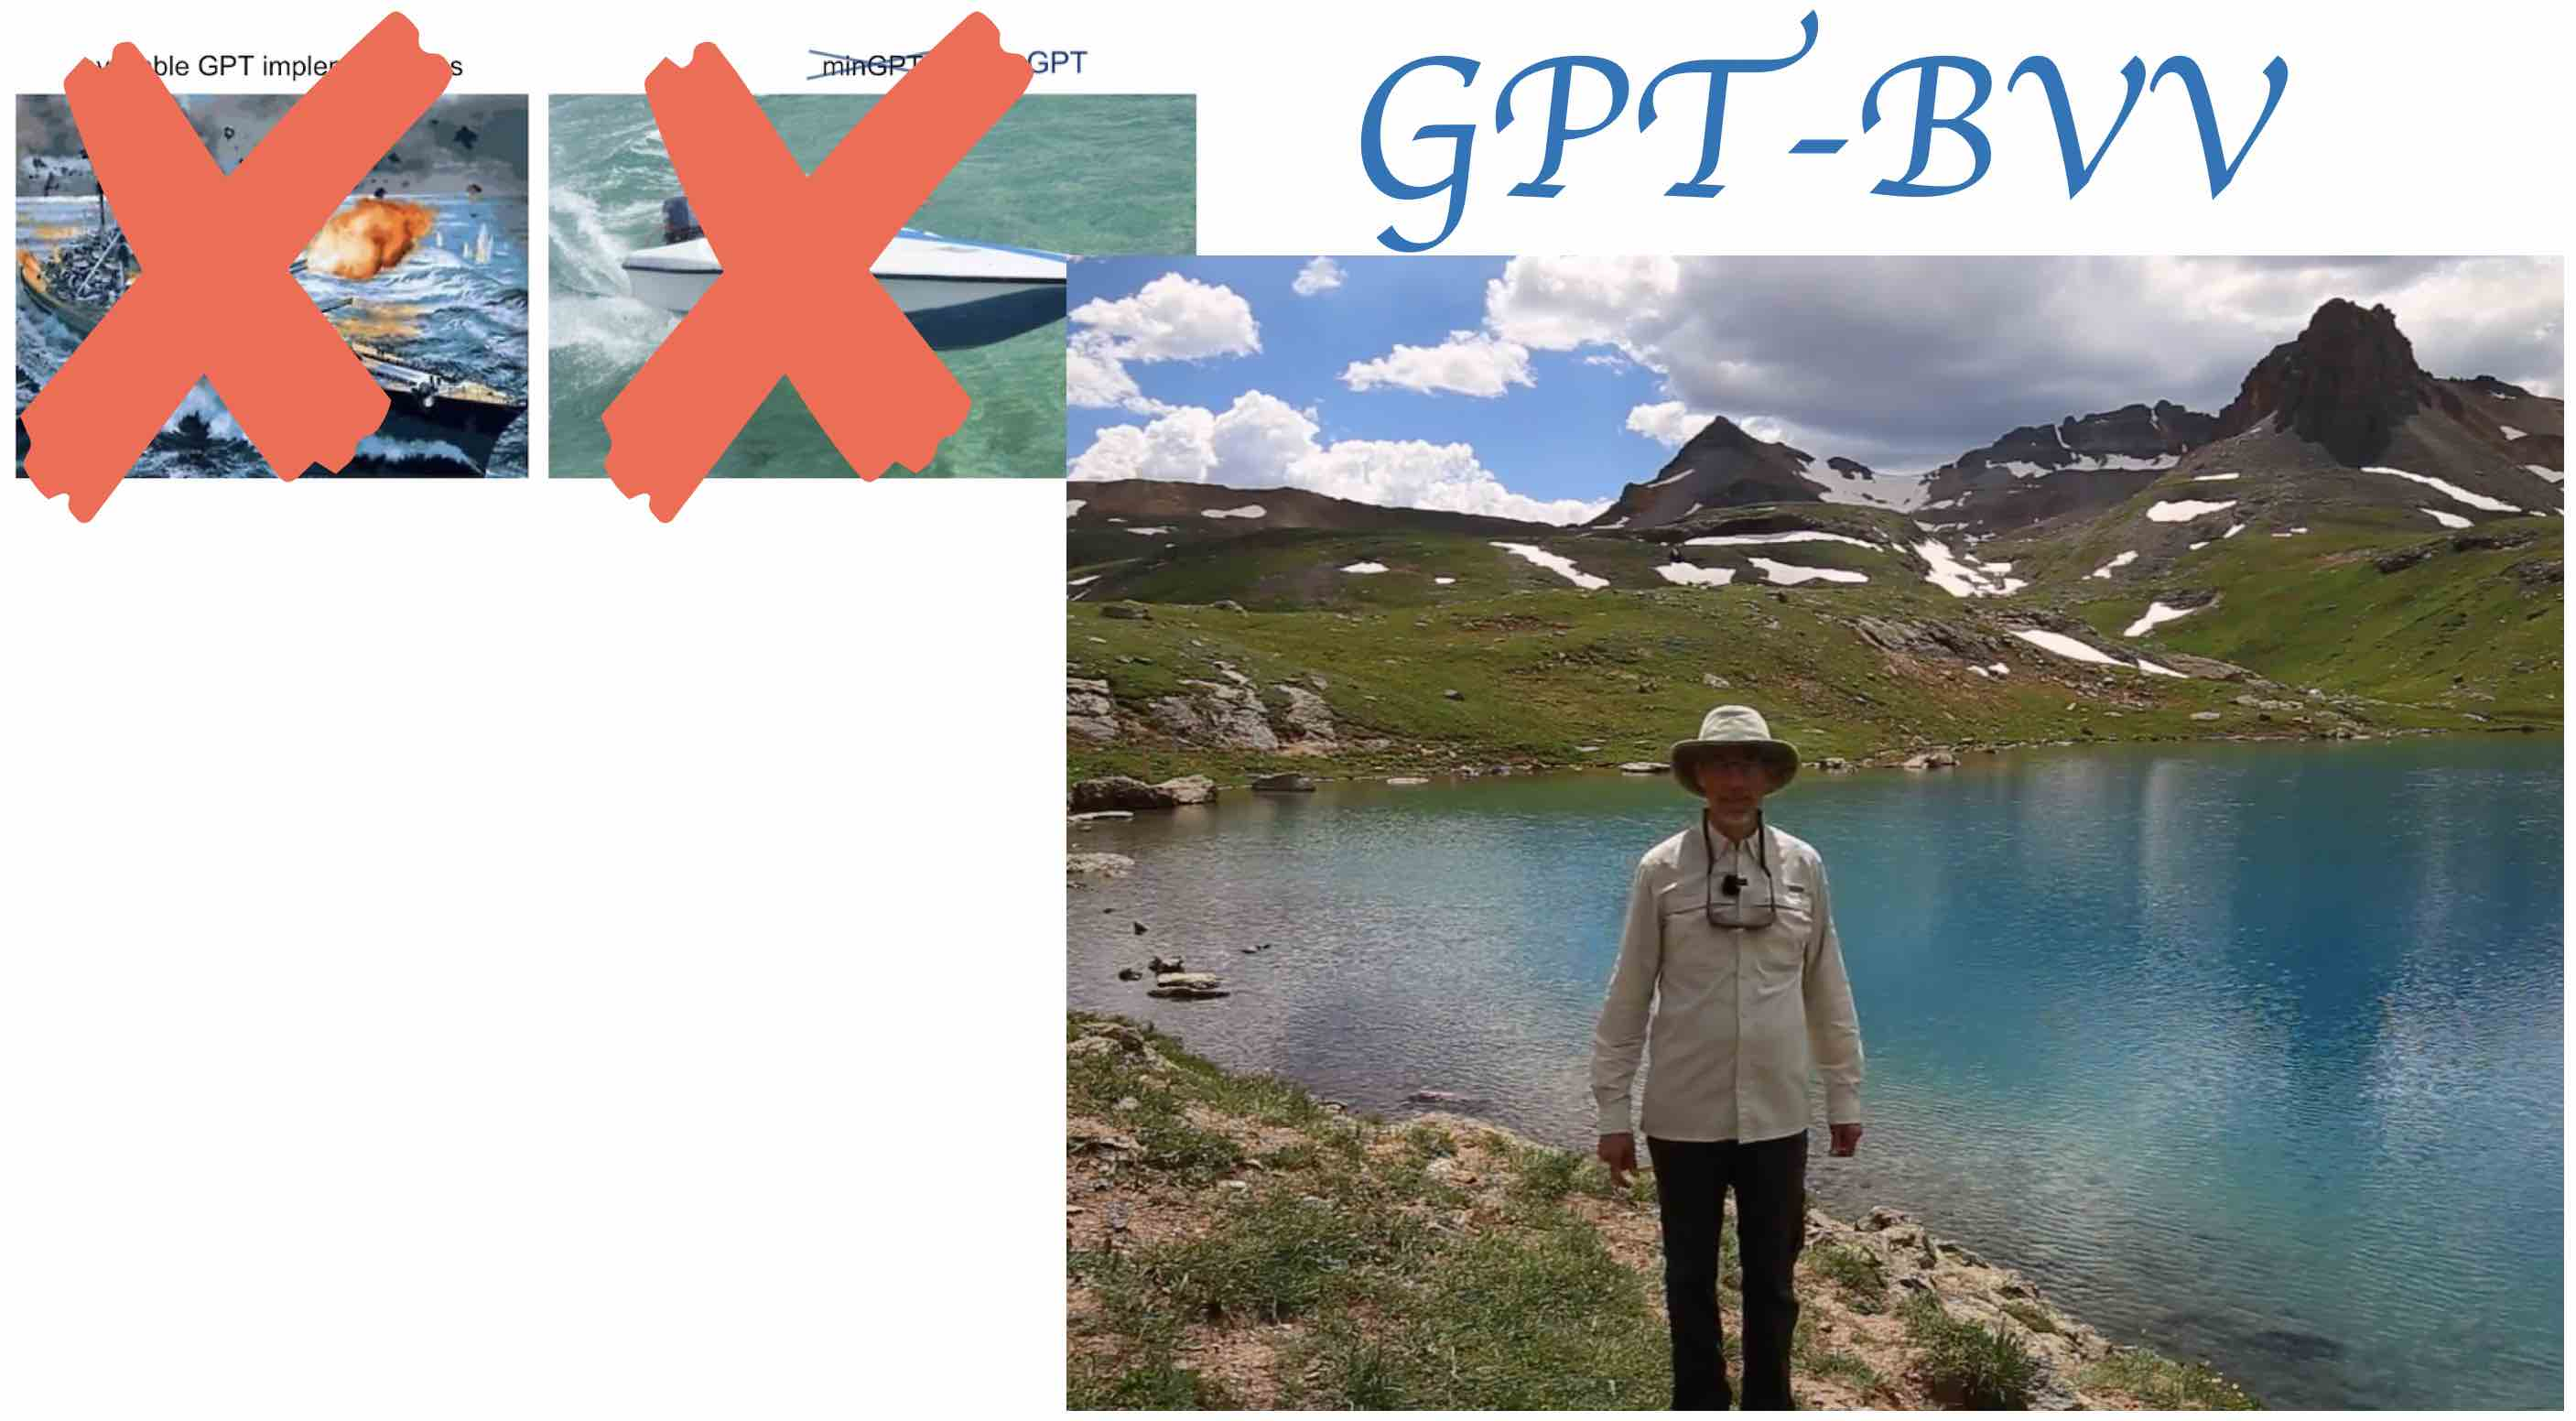

# First, install all the necessary dependencies

In [ ]:
!sudo apt-get install unzip
!unzip nanoGPT-BVV.zip
!mv nanoGPT-BVV/* .
!pip install torch numpy transformers datasets tiktoken wandb tqdm openai

# Generate a large collection of poems on Barry Van Veen's life (using OpenAI GPT3.5)

# You can skip this part and just use the input.txt given in the repository

In [ ]:
synthetic_BVV_text = ""

In [ ]:
# Generate synthetic BVV text data
import openai, time

# Replace this with your own OpenAI API key
openai.api_key = # PUT YOUR OpenAI API key here

prompt = "Biography Barry D. Van Veen (S’81-M’86-SM’97-F’02) was born in Green Bay, WI. He received the B.S. degree from Michigan Technological University in 1983 and the Ph.D. degree from the University of Colorado in 1986, both in electrical engineering. He was an ONR Fellow while working on the Ph.D. degree. \
He has been with the Department of Electrical and Computer Engineering at the University of Wisconsin-Madison since 1987 and is currently Lynn H. Matthias Professor of Electrical and Computer Engineering. His research interests include signal processing for sensor arrays and biomedical applications of signal processing.\
Dr. Van Veen was a recipient of a 1989 Presidential Young Investigator Award from the National Science Foundation and a 1990 IEEE Signal Processing Society Paper Award. He served as an associate editor for the IEEE Transactions on Signal Processing and on the IEEE Signal Processing Society’s Statistical Signal and Array Processing Technical Committee and the Sensor Array and Multichannel Technical Committee. He received the 1997 Holdridge Teaching Excellence Award from the ECE Department, the 2014 Spangler Award for Technology Enhanced Instruction from the College of Engineering, and the 2015 Chancellor’s Distinguished Teaching Award at the University of Wisconsin. He coauthored “Signals and Systems,” (1st Ed. 1999, 2nd Ed., 2003 Wiley) with Simon Haykin and is the Chief Education Officer at AllSignalProcessing.com, a website devoted to signal processing instruction. Dr. Van Veen is a Fellow of the IEEE.\
Biography of Barry Van Veen\
I received the B.S. degree from Michigan Technological University and the Ph.D. from the University of Colorado, both in Electrical Engineering and have been a faculty member in the Electrical and Computer Engineering Department at the University of Wisconsin since 1987. My current title is the Lynn H. Matthias Professor of Electrical and Computer Engineering.\
My research program of more than 30 years has spanned a wide range of signal-processing problems and applications, including signal processing methods for modeling brain electrical signals, microwave imaging of the human body, wireless communications, acoustics, radar, and sonar. In 1989 I received the Presidential Young Investigator Award from the National Science Foundation.  I was elected a Fellow of the Institute for Electrical and Electronic Engineers for my research in subspace-based signal processing algorithms.\
I have taught a wide range of signal-processing classes ranging from introductory to the advanced graduate level. I co-authored an undergraduate textbook Signals and Systems (1st Ed. 1999, 2nd Ed. 2003, John Wiley & Sons, Inc) with Prof. Simon Haykin.  My teaching has been recognized at the University of Wisconsin with multiple awards, including the Harvey S. Spangler Award for Technology-Enhanced Instruction (2014), the Chancellor's Distinguished Teaching Award (2015) and the Benjamin Smith Reynolds Award for Teaching Engineers (2017). I recently began an engineering education research project on helping students develop internal visual representations for signal processing concepts.\
I am married with three children and enjoy a wide variety of activities in my spare time, including backpacking, hiking, astronomy, biking, fly-fishing, and photography.\
====\
Given this, write fifty poems on Barry Van Veen's life. Write the longest possible poem you can imagine. Make it fun. Your entire response should be of at least 4000 characters."


In [ ]:
# Repeatedly call OpenAI API calls to generate a huge collection
for i in range(500):
  response = openai.ChatCompletion.create(
    model="gpt-3.5-turbo",
    messages=[
      {"role": "system", "content": "You are a friendly chatbot. Do whatever you are asked to do. Write your response as long as possible."},
      {"role": "user", "content": prompt},
    ]
  )

  synthetic_BVV_text += response.choices[0].message.content + "\n"
  print(i, "Total length:", len(synthetic_BVV_text))

In [ ]:
# Write into a txt file
with open("data/BVV_char/input.txt", "w") as text_file:
    text_file.write(synthetic_BVV_text)

# Now, let's TRAIN A GPT-BVV!

In [ ]:
# Preprocess the data (train/val split)
!python data/BVV_char/prepare.py

In [ ]:
!python train.py config/train_BVV_char.py

# Now, let's generate text using our GPT-BVV!

In [ ]:
!python sample.py --out_dir=out-BVV-char --start="Barry Van Veen, a professional hiker"